In [132]:
import os
import matplotlib.pyplot as plt
import pandas as pd

os.chdir(os.path.dirname(os.path.abspath(__file__)))

# データの読みこみ
customer_master = pd.read_csv("01_input/customer_master.csv")
print("customer_master:")
customer_master.head()

customer_master:


,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,IK152942,平田 裕次郎,2019-01-01 00:25:33,ひらた ゆうじろう,hirata_yuujirou@example.com,M,29,1990/6/10,石川県
1,TS808488,田村 詩織,2019-01-01 01:13:45,たむら しおり,tamura_shiori@example.com,F,33,1986/5/20,東京都
2,AS834628,久野 由樹,2019-01-01 02:00:14,ひさの ゆき,hisano_yuki@example.com,F,63,1956/1/2,茨城県
3,AS345469,鶴岡 薫,2019-01-01 04:48:22,つるおか かおる,tsuruoka_kaoru@example.com,M,74,1945/3/25,東京都
4,GD892565,大内 高史,2019-01-01 04:54:51,おおうち たかし,oouchi_takashi@example.com,M,54,1965/8/5,千葉県


In [133]:
item_master = pd.read_csv("01_input/item_master.csv")
print("item_master:")
item_master.head()

item_master:


,item_id,item_name,item_price
0,S001,PC-A,50000
1,S002,PC-B,85000
2,S003,PC-C,120000
3,S004,PC-D,180000
4,S005,PC-E,210000


In [134]:
transaction_1 = pd.read_csv("01_input/transaction_1.csv")
transaction_2 = pd.read_csv("01_input/transaction_2.csv")

print("transaction:")
transaction_1.head()

transaction:


,transaction_id,price,payment_date,customer_id
0,T0000000113,210000,2019-02-01 01:36:57,PL563502
1,T0000000114,50000,2019-02-01 01:37:23,HD678019
2,T0000000115,120000,2019-02-01 02:34:19,HD298120
3,T0000000116,210000,2019-02-01 02:47:23,IK452215
4,T0000000117,170000,2019-02-01 04:33:46,PL542865


In [135]:
transaction_detail_1 = pd.read_csv("01_input/transaction_detail_1.csv")
transaction_detail_2 = pd.read_csv("01_input/transaction_detail_2.csv")

print("transaction_detail:")
transaction_detail_1.head()

transaction_detail:


,detail_id,transaction_id,item_id,quantity
0,0,T0000000113,S005,1
1,1,T0000000114,S001,1
2,2,T0000000115,S003,1
3,3,T0000000116,S005,1
4,4,T0000000117,S002,2


In [136]:
# 複数ファイルにわたっているデータ（transaction, transaction_detail）の結合(縦の結合）
transaction = pd.concat([transaction_1, transaction_2], ignore_index=True)
print(len(transaction_1))
print(len(transaction_2))
print(len(transaction))

5000
1786
6786


In [137]:
transaction_detail = pd.concat(
    [transaction_detail_1, transaction_detail_2], ignore_index=True
)
print(len(transaction_detail_1))
print(len(transaction_detail_2))
print(len(transaction_detail))

5000
2144
7144


In [138]:
# dataframe同士の結合（横の結合）
# 最もデータ粒度が細かいtransaction_detailを主軸とする
# 1.transaction_detailにtransactionを結合する
# （1.追加するデータ列：[payment_date, customer_id], 2.共通するデータ列：transaction_id）
join_transaction = pd.merge(
    transaction_detail,
    transaction[["transaction_id", "payment_date", "customer_id"]],
    how="left",
    on="transaction_id",
)
print("join_transaction:")
join_transaction.head()

join_transaction:


,detail_id,transaction_id,item_id,quantity,payment_date,customer_id
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865


In [139]:
print(f"transaction_detail len:{len(transaction_detail)}")
print(f"transaction len:{len(transaction)}")
print(f"join_transaction len: {len(join_transaction)}")

transaction_detail len:7144
transaction len:6786
join_transaction len: 7144


In [140]:
# 2.join_transactionにマスターデータ（customer_master, item_master）を結合する
# customer_masterデータの結合
# (1.追加するデータ列：すべて, 2.共通するデータ列：customer_id)
join_data = pd.merge(join_transaction, customer_master, how="left", on="customer_id")
print("join_data:")
join_data.head()

join_data:


,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県


In [141]:
print(f"join_transaction len:{len(join_transaction)}")
print(f"customer_master len:{len(customer_master)}")
print(f"join_data len:{len(join_data)}")

join_transaction len:7144
customer_master len:5000
join_data len:7144


In [142]:
# item_masterデータの結合
# (1.追加するデータ列：すべて, 2.共通するデータ列:item_id)
join_data = pd.merge(join_data, item_master, how="left", on="item_id")
join_data.head()

,detail_id,transaction_id,item_id,quantity,payment_date,customer_id,customer_name,registration_date,customer_name_kana,email,gender,age,birth,pref,item_name,item_price
0,0,T0000000113,S005,1,2019-02-01 01:36:57,PL563502,井本 芳正,2019-01-07 14:34:35,いもと よしまさ,imoto_yoshimasa@example.com,M,30,1989/7/15,熊本県,PC-E,210000
1,1,T0000000114,S001,1,2019-02-01 01:37:23,HD678019,三船 六郎,2019-01-27 18:00:11,みふね ろくろう,mifune_rokurou@example.com,M,73,1945/11/29,京都府,PC-A,50000
2,2,T0000000115,S003,1,2019-02-01 02:34:19,HD298120,山根 小雁,2019-01-11 08:16:02,やまね こがん,yamane_kogan@example.com,M,42,1977/5/17,茨城県,PC-C,120000
3,3,T0000000116,S005,1,2019-02-01 02:47:23,IK452215,池田 菜摘,2019-01-10 05:07:38,いけだ なつみ,ikeda_natsumi@example.com,F,47,1972/3/17,兵庫県,PC-E,210000
4,4,T0000000117,S002,2,2019-02-01 04:33:46,PL542865,栗田 憲一,2019-01-25 06:46:05,くりた けんいち,kurita_kenichi@example.com,M,74,1944/12/17,長崎県,PC-B,85000


In [143]:
print(f"item_master len:{len(item_master)}")
print(f"join_data len:{len(join_data)}")

item_master len:5
join_data len:7144


In [144]:
# 売上のデータ列を作成する
join_data["price"] = join_data["item_price"] * join_data["quantity"]
join_data[["item_price", "quantity", "price"]].head()

,item_price,quantity,price
0,210000,1,210000
1,50000,1,50000
2,120000,1,120000
3,210000,1,210000
4,85000,2,170000


In [145]:
# 売上のデータ列の検算
print(transaction["price"].sum())
print(join_data["price"].sum())

971135000
971135000


In [146]:
# データ欠損数の確認
join_data.isnull().sum()

detail_id             0
transaction_id        0
item_id               0
quantity              0
payment_date          0
customer_id           0
customer_name         0
registration_date     0
customer_name_kana    0
email                 0
gender                0
age                   0
birth                 0
pref                  0
item_name             0
item_price            0
price                 0
dtype: int64

In [147]:
# データ集計の出力
join_data.describe()

,detail_id,quantity,age,item_price,price
count,7144.000000,7144.000000,7144.000000,7144.000000,7144.000000
mean,3571.500000,1.199888,50.265677,121698.628219,135937.150056
std,2062.439494,0.513647,17.190314,64571.311830,68511.453297
min,0.000000,1.000000,20.000000,50000.000000,50000.000000
25%,1785.750000,1.000000,36.000000,50000.000000,85000.000000
50%,3571.500000,1.000000,50.000000,102500.000000,120000.000000
75%,5357.250000,1.000000,65.000000,187500.000000,210000.000000
max,7143.000000,4.000000,80.000000,210000.000000,420000.000000


In [148]:
# データ取得期間の把握
print("first date: " + join_data["payment_date"].min())
print("last  date: " + join_data["payment_date"].max())

first date: 2019-02-01 01:36:57
last  date: 2019-07-31 23:41:38


In [149]:
# 月別で売上データを集計する
# 1.payment_dateのデータ型を確認する
join_data.dtypes

detail_id              int64
transaction_id        object
item_id               object
quantity               int64
payment_date          object
customer_id           object
customer_name         object
registration_date     object
customer_name_kana    object
email                 object
gender                object
age                    int64
birth                 object
pref                  object
item_name             object
item_price             int64
price                  int64
dtype: object

In [150]:
# 2.payment_dateのデータ型をdatetime型に変換する
join_data["payment_date"] = pd.to_datetime(join_data["payment_date"])

# 3.payment_dateから年月のみを抽出したデータ列(payment_month)を作成する
join_data["payment_month"] = join_data["payment_date"].dt.strftime("%Y-%m")
join_data[["payment_date", "payment_month"]].head()

,payment_date,payment_month
0,2019-02-01 01:36:57,2019-02
1,2019-02-01 01:37:23,2019-02
2,2019-02-01 02:34:19,2019-02
3,2019-02-01 02:47:23,2019-02
4,2019-02-01 04:33:46,2019-02


In [151]:
# 4.月毎に売上データを集計する
join_data[["payment_month", "price"]].groupby("payment_month").sum()

,price
payment_month,
2019-02,160185000
2019-03,160370000
2019-04,160510000
2019-05,155420000
2019-06,164030000
2019-07,170620000


In [152]:
# 月別、商品別で売上データを集計する
join_data[["payment_month", "item_name", "price", "quantity"]].groupby(
    ["payment_month", "item_name"]
).sum()

price  quantity
payment_month item_name                    
2019-02       PC-A       24150000       483
              PC-B       25245000       297
              PC-C       19800000       165
              PC-D       31140000       173
              PC-E       59850000       285
2019-03       PC-A       26000000       520
              PC-B       25500000       300
              PC-C       19080000       159
              PC-D       25740000       143
              PC-E       64050000       305
2019-04       PC-A       25900000       518
              PC-B       23460000       276
              PC-C       21960000       183
              PC-D       24300000       135
              PC-E       64890000       309
2019-05       PC-A       24850000       497
              PC-B       25330000       298
              PC-C       20520000       171
              PC-D       25920000       144
              PC-E       58800000       280
2019-06       PC-A       26000000       520
              PC-B       23970000       282
              PC-C       21840000       182
              PC-D       28800000       160
              PC-E       63420000       302
2019-07       PC-A       25250000       505
              PC-B       28220000       332
              PC-C       19440000       162
              PC-D       26100000       145
              PC-E       71610000       341

In [153]:
# pivot_table関数を使って集計結果を見やすく表示する
pd.pivot_table(
    join_data,
    index="item_name",
    columns="payment_month",
    values=["price", "quantity"],
    aggfunc="sum",
)

price                                                     
payment_month   2019-02   2019-03   2019-04   2019-05   2019-06   2019-07   
item_name                                                                   
PC-A           24150000  26000000  25900000  24850000  26000000  25250000  \
PC-B           25245000  25500000  23460000  25330000  23970000  28220000   
PC-C           19800000  19080000  21960000  20520000  21840000  19440000   
PC-D           31140000  25740000  24300000  25920000  28800000  26100000   
PC-E           59850000  64050000  64890000  58800000  63420000  71610000   

              quantity                                          
payment_month  2019-02 2019-03 2019-04 2019-05 2019-06 2019-07  
item_name                                                       
PC-A               483     520     518     497     520     505  
PC-B               297     300     276     298     282     332  
PC-C               165     159     183     171     182     162  
PC-D               173     143     135     144     160     145  
PC-E               285     305     309     280     302     341

In [154]:
# 商品別の売上の推移を可視化する
# 1.payment_monthをindexとして商品別の売上と販売数を集計する
graph_data = pd.pivot_table(
    join_data,
    index="payment_month",
    columns="item_name",
    values=["price", "quantity"],
    aggfunc="sum",
)
graph_data

price                                         quantity        
item_name          PC-A      PC-B      PC-C      PC-D      PC-E     PC-A PC-B   
payment_month                                                                   
2019-02        24150000  25245000  19800000  31140000  59850000      483  297  \
2019-03        26000000  25500000  19080000  25740000  64050000      520  300   
2019-04        25900000  23460000  21960000  24300000  64890000      518  276   
2019-05        24850000  25330000  20520000  25920000  58800000      497  298   
2019-06        26000000  23970000  21840000  28800000  63420000      520  282   
2019-07        25250000  28220000  19440000  26100000  71610000      505  332   

                              
item_name     PC-C PC-D PC-E  
payment_month                 
2019-02        165  173  285  
2019-03        159  143  305  
2019-04        183  135  309  
2019-05        171  144  280  
2019-06        182  160  302  
2019-07        162  145  341

Text(0.5, 1.0, 'quantity')

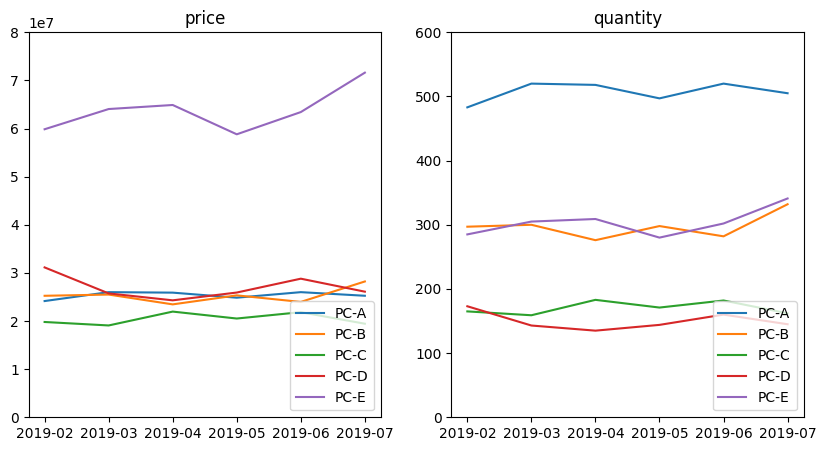

In [155]:
# 2.商品別の売上の推移を可視化する
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(graph_data.index, graph_data.loc[:, ("price", "PC-A")], label="PC-A")
ax1.plot(graph_data.index, graph_data.loc[:, ("price", "PC-B")], label="PC-B")
ax1.plot(graph_data.index, graph_data.loc[:, ("price", "PC-C")], label="PC-C")
ax1.plot(graph_data.index, graph_data.loc[:, ("price", "PC-D")], label="PC-D")
ax1.plot(graph_data.index, graph_data.loc[:, ("price", "PC-E")], label="PC-E")
ax1.set_ylim([0, 80000000])
ax1.legend(loc="lower right")
ax1.set_title("price")

# 3.商品別の販売数の推移を可視化する
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(graph_data.index, graph_data.loc[:, ("quantity", "PC-A")], label="PC-A")
ax2.plot(graph_data.index, graph_data.loc[:, ("quantity", "PC-B")], label="PC-B")
ax2.plot(graph_data.index, graph_data.loc[:, ("quantity", "PC-C")], label="PC-C")
ax2.plot(graph_data.index, graph_data.loc[:, ("quantity", "PC-D")], label="PC-D")
ax2.plot(graph_data.index, graph_data.loc[:, ("quantity", "PC-E")], label="PC-E")
ax2.set_ylim([0, 600])
ax2.legend(loc="lower right")
ax2.set_title("quantity")